In [44]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from datetime import datetime

In [45]:
data = r"PQRD_2020.csv"
df = pd.read_csv(data, encoding="latin1", sep=";")
ruta_absoluta = os.path.abspath(data)
print(ruta_absoluta)
print("\nBase de Datos Reclamos:\n")
print(df.dtypes)
print(df.head(5))

c:\Universidad\SBA\Unidad_2\PQRD_2020.csv

Base de Datos Reclamos:

ï»¿OID_                 int64
ID                    float64
AÃO                    int64
MES                     int64
PQR_CANAL              object
PET_COD_DEPTO         float64
PET_COD_MPIO          float64
ID_AFEC                object
AFEC_PARENTESCO        object
AFEC_GENERO            object
AFEC_EDADR             object
AFEC_EDUC              object
AFEC_REGAFILIACION     object
AFEC_GETNICO           object
AFEC_POBESPECIAL       object
AFEC_COD_DEPTO        float64
AFEC_COD_MPIO         float64
ENT_NOMBRE             object
ENT_TIPOVIG_SNS        object
ENT_COD_SNS            object
ENT_ALIAS_SNS          object
ENT_COD_DEPTO           int64
ENT_COD_MPIO            int64
COD_MACROMOT            int64
MACROMOTIVO            object
COD_MOTGEN              int64
MOTIVO_GENERAL         object
COD_MOTESP              int64
MOTIVO_ESPECIFICO      object
PATOLOGIA_1            object
PATOLOGIA_TIPO         object
CI

In [46]:
#df['AÃO'] = df['AÃO'].astype(str)  
#df['MES'] = df['MES'].astype(int)

In [47]:
orden_edades = [
    'De 0 A 5 Años',
    'De 6 A 12 Años',
    'De 13 A 17 Años',
    'De 18 A 24 Años',
    'De 25 A 29 Años',
    'De 30 A 37 Años',
    'De 38 A 49 Años',
    'De 50 A 62 Años',
    'Mayor de 63 Años'
]

In [48]:
# Crear un diccionario para mapear números a nombres de meses
meses_dict = {
    1: 'Ene',
    2: 'Feb',
    3: 'Mar',
    4: 'Abr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Ago',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dic'
}

In [49]:
print(meses_dict)

{1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Ago', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'}


In [61]:
df = df.drop(['ID','ï»¿OID_','ID_AFEC', 'AFEC_PARENTESCO', 'AFEC_EDUC', 'AFEC_COD_DEPTO', 
              'ENT_NOMBRE','AFEC_COD_MPIO', 'ENT_COD_SNS', 'ENT_COD_DEPTO', 'ENT_COD_MPIO', 
              'COD_MACROMOT', 'COD_MOTGEN', 'ENT_TIPOVIG_SNS', 'COD_MOTESP'], 
             axis=1, errors="ignore").copy()
display(df.head(5))

,AÃO,MES,PQR_CANAL,PET_COD_DEPTO,PET_COD_MPIO,AFEC_GENERO,AFEC_EDADR,AFEC_REGAFILIACION,AFEC_GETNICO,AFEC_POBESPECIAL,ENT_ALIAS_SNS,MACROMOTIVO,MOTIVO_GENERAL,MOTIVO_ESPECIFICO,PATOLOGIA_1,PATOLOGIA_TIPO,CIE_10,RIESGO_VIDA,ALTO_COSTO
0,2020,7,Chat,11.0,11001.0,Mujer,DE 25 A 29 AÃOS,Contributivo,No Aplica,No Aplica,COMPENSAR,RESTRICCIÃN EN EL ACCESO A LOS SERVICIOS DE S...,RESTRICCIÃN EN EL ACCESO POR FALTA DE OPORTUN...,FALTA DE OPORTUNIDAD PARA LA PRESTACIÃN DE SE...,ENFERMEDADES CRÃNICAS NO TRANSMISIBLES RESPIR...,NEUMONÃA,"INFECCION DEBIDA A CORONAVIRUS, SIN OTRA ESPEC...",SI,NO APLICA
1,2020,10,Web,11.0,11001.0,Mujer,DE 25 A 29 AÃOS,Contributivo,No Aplica,No Aplica,FAMISANAR,INSATISFACCIÃN DEL USUARIO CON EL PROCESO ADM...,LIMITACIONES EN LA INFORMACIÃN,"DEFICIENTE INFORMACIÃN SOBRE DERECHOS, DEBERE...",PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,NO,NO APLICA
2,2020,5,Web,11.0,11001.0,Mujer,DE 25 A 29 AÃOS,Contributivo,No Aplica,No Aplica,EPS SURA,RESTRICCIÃN EN EL ACCESO A LOS SERVICIOS DE S...,RESTRICCIÃN EN EL ACCESO POR FALLAS EN LA AFI...,BARRERAS DE ACCESO EN LA AFILIACIÃN (TRAMITES...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,OTROS PROBLEMAS RELACIONADOS CON DEPENDENCIA D...,NO,NO APLICA
3,2020,4,TelefÃ³nico,11.0,11001.0,Mujer,DE 25 A 29 AÃOS,Contributivo,No Aplica,No Aplica,COMPENSAR,RESTRICCIÃN EN EL ACCESO A LOS SERVICIOS DE S...,RESTRICCIÃN EN EL ACCESO POR DEMORAS EN LA AU...,DEMORA DE LA REFERENCIA O CONTRARREFERENCIA,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,DOLOR AGUDO,SI,NO APLICA
4,2020,12,Web,11.0,11001.0,Mujer,DE 25 A 29 AÃOS,Contributivo,No Aplica,No Aplica,COMPENSAR,RESTRICCIÃN EN EL ACCESO A LOS SERVICIOS DE S...,RESTRICCIÃN EN EL ACCESO POR FALTA DE OPORTUN...,FALTA DE OPORTUNIDAD EN LA ASIGNACIÃN DE CITA...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,OTRAS ATENCIONES MÃDICAS ESPECIFICADAS,NO,NO APLICA


In [51]:
print("\nDimensiones de la Data:\n")
print(df.shape)


Dimensiones de la Data:

(850927, 20)


In [52]:
# Ver columnas con valores nulos
print(df.isnull().sum())

ï»¿OID_                  0
AÃO                     0
MES                      0
PQR_CANAL                0
PET_COD_DEPTO         1624
PET_COD_MPIO          1624
AFEC_GENERO           1266
AFEC_EDADR               0
AFEC_REGAFILIACION       0
AFEC_GETNICO             0
AFEC_POBESPECIAL         0
ENT_ALIAS_SNS            0
MACROMOTIVO              0
MOTIVO_GENERAL           0
MOTIVO_ESPECIFICO        0
PATOLOGIA_1              0
PATOLOGIA_TIPO           0
CIE_10                   0
RIESGO_VIDA              0
ALTO_COSTO               0
dtype: int64


In [53]:
df = df.fillna("No Aplica")  # Para texto
df = df.fillna(0)  # Para números
print(df.isnull().sum())

ï»¿OID_               0
AÃO                  0
MES                   0
PQR_CANAL             0
PET_COD_DEPTO         0
PET_COD_MPIO          0
AFEC_GENERO           0
AFEC_EDADR            0
AFEC_REGAFILIACION    0
AFEC_GETNICO          0
AFEC_POBESPECIAL      0
ENT_ALIAS_SNS         0
MACROMOTIVO           0
MOTIVO_GENERAL        0
MOTIVO_ESPECIFICO     0
PATOLOGIA_1           0
PATOLOGIA_TIPO        0
CIE_10                0
RIESGO_VIDA           0
ALTO_COSTO            0
dtype: int64


In [54]:
# Distribución de variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nTop valores en {col}:\n", df[col].value_counts().head(5))



Top valores en AÃO:
 AÃO
2020    850927
Name: count, dtype: int64

Top valores en PQR_CANAL:
 PQR_CANAL
TelefÃ³nico      348431
Web              294933
Personalizado     76050
Chat              67017
Escrito           27150
Name: count, dtype: int64

Top valores en PET_COD_DEPTO:
 PET_COD_DEPTO
11.0    211427
5.0     134496
76.0    116195
8.0      51230
25.0     44289
Name: count, dtype: int64

Top valores en PET_COD_MPIO:
 PET_COD_MPIO
11001.0    211427
5001.0      78107
76001.0     71616
8001.0      34047
68001.0     17261
Name: count, dtype: int64

Top valores en AFEC_GENERO:
 AFEC_GENERO
Mujer        489740
Hombre       359921
No Aplica      1266
Name: count, dtype: int64

Top valores en AFEC_EDADR:
 AFEC_EDADR
MAYOR DE 63 AÃOS    260948
DE 50 A 62 AÃOS     177774
DE 38 A 49 AÃOS     135678
DE 30 A 37 AÃOS      92784
DE 25 A 29 AÃOS      55084
Name: count, dtype: int64

Top valores en AFEC_REGAFILIACION:
 AFEC_REGAFILIACION
Contributivo         568033
Subsidiado           2

Text(0.5, 1.0, 'Distribución de PQRs por Género')

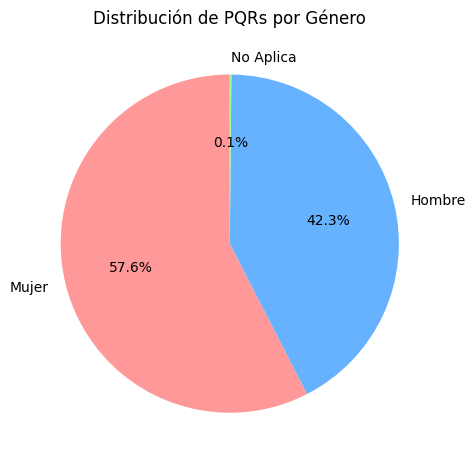

In [55]:
#Gráfico de Pastel de distribución por género
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
    
genero_counts = df['AFEC_GENERO'].value_counts()
colores = ['#FF9999', '#66B2FF', '#99FF99'] 
    
plt.pie(genero_counts.values, 
            labels=genero_counts.index,
            colors=colores,
            autopct='%1.1f%%',
            startangle=90)
plt.title('Distribución de PQRs por Género')

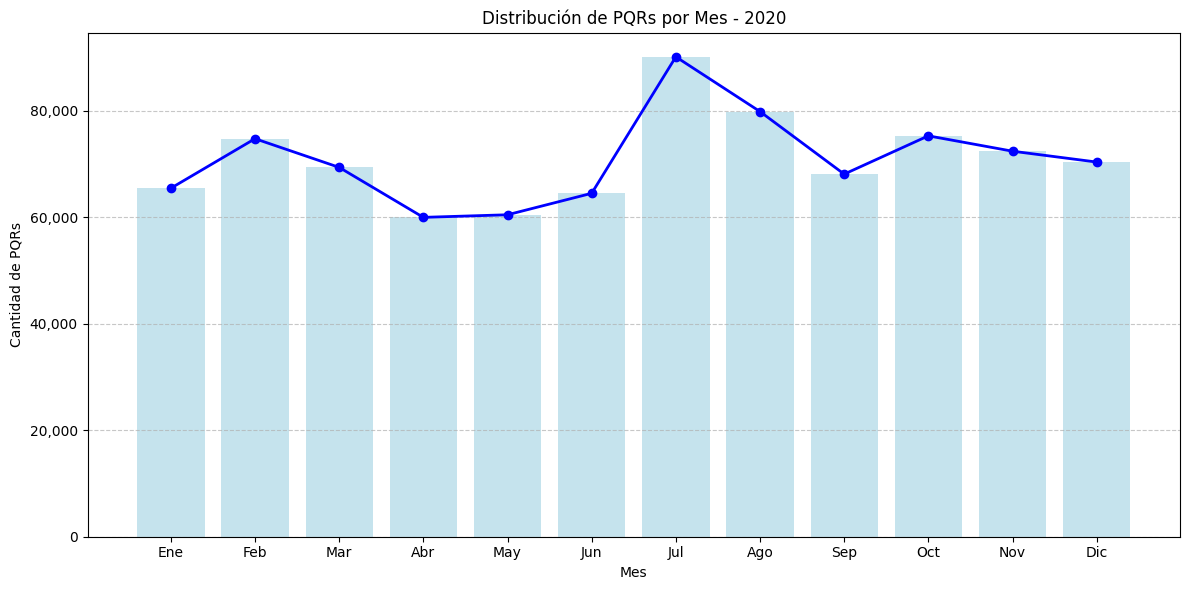


Distribución de PQRs por mes:
Ene: 65,474
Feb: 74,776
Mar: 69,389
Abr: 60,000
May: 60,486
Jun: 64,517
Jul: 90,158
Ago: 79,874
Sep: 68,120
Oct: 75,314
Nov: 72,429
Dic: 70,390


In [56]:
# Agrupar por año y mes para contar frecuencias
conteo_mes = df.groupby('MES').size().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(range(len(conteo_mes)), conteo_mes.values, color='lightblue', alpha=0.7)
plt.plot(range(len(conteo_mes)), conteo_mes.values, color='blue', linewidth=2, marker='o')

# Modificar las etiquetas del eje x usando el diccionario de meses
plt.xticks(range(len(conteo_mes)), [meses_dict[mes] for mes in conteo_mes.index], rotation=0)

plt.title('Distribución de PQRs por Mes - 2020', fontsize=12)
plt.xlabel('Mes')
plt.ylabel('Cantidad de PQRs')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

# Imprimir los valores
print("\nDistribución de PQRs por mes:")
for mes in sorted(conteo_mes.index):
    print(f"{meses_dict[mes]}: {conteo_mes[mes]:,}")

In [57]:
print(df.columns)

Index(['ï»¿OID_', 'AÃO', 'MES', 'PQR_CANAL', 'PET_COD_DEPTO', 'PET_COD_MPIO',
       'AFEC_GENERO', 'AFEC_EDADR', 'AFEC_REGAFILIACION', 'AFEC_GETNICO',
       'AFEC_POBESPECIAL', 'ENT_ALIAS_SNS', 'MACROMOTIVO', 'MOTIVO_GENERAL',
       'MOTIVO_ESPECIFICO', 'PATOLOGIA_1', 'PATOLOGIA_TIPO', 'CIE_10',
       'RIESGO_VIDA', 'ALTO_COSTO'],
      dtype='object')


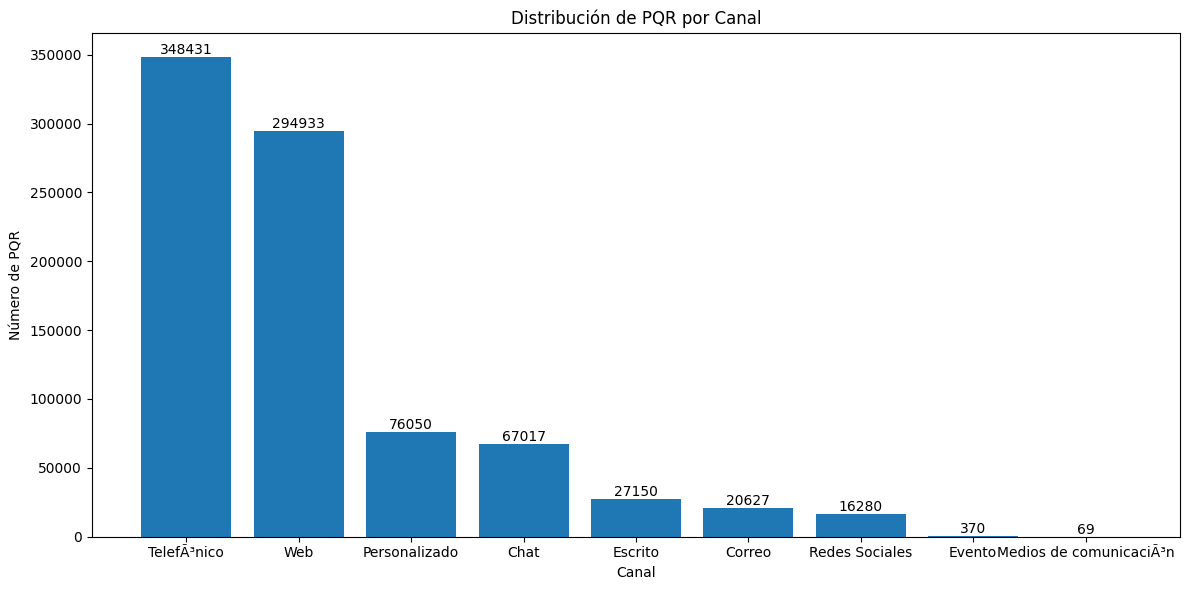

In [58]:
# Gráfico de barras para la distribución de PQR por canal
plt.figure(figsize=(12, 6))
canal_counts = df['PQR_CANAL'].value_counts()
    
plt.bar(canal_counts.index, canal_counts.values)
plt.title('Distribución de PQR por Canal')
plt.xlabel('Canal')
plt.ylabel('Número de PQR')
plt.xticks(rotation=0)
    
for i, v in enumerate(canal_counts.values): # Añadimos etiquetas con valores
    plt.text(i, v, str(v), ha='center', va='bottom')
    plt.tight_layout()

plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_8316\2825071639.py:36: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Universidad\SBA\Unidad_2\avs2\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


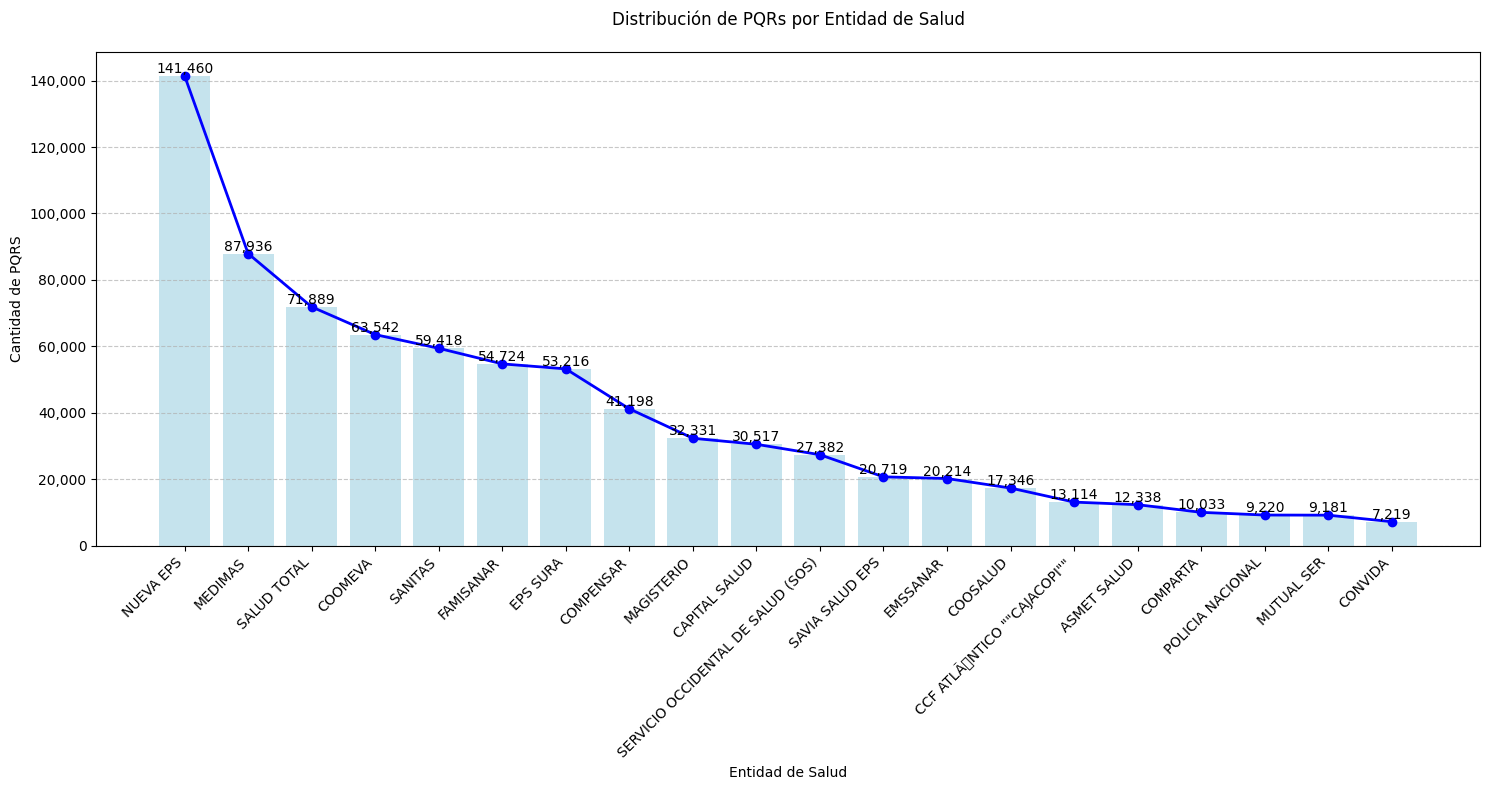


Distribución de PQRs por entidad:
NUEVA EPS: 141,460
MEDIMAS: 87,936
SALUD TOTAL: 71,889
COOMEVA: 63,542
SANITAS: 59,418
FAMISANAR: 54,724
EPS SURA: 53,216
COMPENSAR: 41,198
MAGISTERIO: 32,331
CAPITAL SALUD: 30,517
SERVICIO OCCIDENTAL DE SALUD (SOS): 27,382
SAVIA SALUD EPS: 20,719
EMSSANAR: 20,214
COOSALUD: 17,346
CCF ATLÃNTICO ""CAJACOPI"": 13,114
ASMET SALUD: 12,338
COMPARTA: 10,033
POLICIA NACIONAL: 9,220
MUTUAL SER: 9,181
CONVIDA: 7,219


In [60]:
# frecuencias de PQRS por entidad - TOP 20 Entidades 
conteo_entidades = df['ENT_ALIAS_SNS'].value_counts().head(20)
    
plt.figure(figsize=(15, 8))
plt.bar(range(len(conteo_entidades)), 
            conteo_entidades.values, 
            color='lightblue', 
            alpha=0.7)
plt.plot(range(len(conteo_entidades)), 
            conteo_entidades.values, 
            color='blue', 
            linewidth=2, 
            marker='o')
plt.xticks(range(len(conteo_entidades)), 
              conteo_entidades.index, 
              rotation=45, 
              ha='right')
plt.title('Distribución de PQRs por Entidad de Salud', 
             fontsize=12, 
             pad=20)
plt.xlabel('Entidad de Salud')
plt.ylabel('Cantidad de PQRS')
    

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    

plt.gca().yaxis.set_major_formatter(
plt.FuncFormatter(lambda x, p: format(int(x), ','))
    )
    
for i, valor in enumerate(conteo_entidades.values):
        plt.text(i, valor, format(valor, ','),
                ha='center', va='bottom')
    
plt.tight_layout()
plt.show()
    
# Imprimir los valores
print("\nDistribución de PQRs por entidad:")
for entidad, valor in conteo_entidades.items():
        print(f"{entidad}: {valor:,}")